
NumPy, Pandas & Matplotlib Integration

Last Updated: November 20th, 2024

Objective:

Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.


Dataset:

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

Download the dataset here.

or you can download it directly

Here.


Tasks:

    Data Import and Cleaning:
        Import the dataset using Pandas.
        Identify missing values and handle them appropriately.
        Use NumPy to convert relevant columns to numerical types if necessary.

    Exploratory Data Analysis:
        Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
        Explore the distribution of power plants by country and fuel type.

    Statistical Analysis:
        Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
        Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

    Time Series Analysis:
        If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
        Explore how the mix of fuel types for power generation has evolved over the years.

    Advanced Visualization:
        Create visualizations using Matplotlib and Seaborn to illustrate your findings.
        Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

    Matrix Operations in Real-World Context:
        Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
        Discuss the relevance of eigenvectors and eigenvalues in this context.

    Integrating NumPy with Pandas and Matplotlib:
        Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
        Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skimpy import skim
from scipy.stats import ttest_ind

In [13]:

df = pd.read_csv("global_power_plant_database.csv", low_memory=False)
print(df.head())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

In [5]:
print(df.describe())

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

In [24]:
df.head().T

,0,1,2,3,4
country,AFG,AFG,AFG,AFG,AFG
country_long,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
name,Kajaki Hydroelectric Power Plant Afghanistan,Kandahar DOG,Kandahar JOL,Mahipar Hydroelectric Power Plant Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan
gppd_idnr,GEODB0040538,WKS0070144,WKS0071196,GEODB0040541,GEODB0040534
capacity_mw,33.0,10.0,10.0,66.0,100.0
latitude,32.322,31.67,31.623,34.556,34.641
longitude,65.119,65.795,65.792,69.4787,69.717
primary_fuel,Hydro,Solar,Solar,Hydro,Hydro
other_fuel1,NaN,NaN,NaN,NaN,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 34936  │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ capacity_mw   │     0 │             0 │  163.4 │ 489.6 │      1 │    4.9 │  16.74 │ 75.34 │ 22500 │   ▇    │  │
│ │ latitude      │     0 │             0 │  32.82 │ 22.64 │ -77.85 │  29.26 │  39.73 │ 46.26 │ 71.29 │   ▁▁▇▃ │  │
│ │ longitude     │     0 │             0 │ -6.973 │ 78.41 │   -180 │ -77.64 │ -2.127 │  49.5 │ 179.4 │ ▁▇▅▆▅▂ │  │
│ │ commissioning │ 17489 │ 50.0601099152 │   1997 │  23.4 │   1896 │   1988 │   2007 │  2014 │  2020 │    ▁▂▇ │  │
│ │ _year         │       │          7364 │        │       │        │        │        │       │       │        │  │
│ │ year_of_capac │ 20049 │ 57.3877948248 │   2018 │ 1.606 │   2000 │   2017 │   2019 │  2019 │  2019 │      ▇ │  │
│ │ ity_data      │       │         22535 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 28519 │ 81.6321273185 │  592.7 │  2175 │ -947.6 │  1.947 │  23.43 │ 199.7 │ 50830 │   ▇    │  │
│ │ h_2013        │       │           253 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 27710 │ 79.3164643920 │  656.9 │  2231 │ -989.6 │   2.26 │  23.61 │ 226.3 │ 32320 │   ▇    │  │
│ │ h_2014        │       │          3114 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 26733 │ 76.5199221433 │  762.4 │  2533 │ -864.4 │  2.665 │  26.14 │ 285.9 │ 37430 │   ▇    │  │
│ │ h_2015        │       │          4784 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25792 │ 73.8264254637 │  693.1 │  2405 │ -768.6 │  2.729 │  22.46 │ 249.9 │ 32380 │   ▇    │  │
│ │ h_2016        │       │          0506 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25436 │ 72.8074192809 │  661.8 │  2369 │ -934.9 │  2.467 │  17.88 │ 214.5 │ 36450 │   ▇    │  │
│ │ h_2017        │       │          7092 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25299 │ 72.4152736432 │  517.3 │  1975 │ -982.6 │  2.242 │  12.53 │ 151.1 │ 35140 │   ▇    │  │
│ │ h_2018        │       │          3333 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25277 │ 72.3523013510 │  423.9 │  1699 │ -780.3 │  2.752 │  11.53 │ 122.8 │ 31920 │   ▇    │  │
│ │ h_2019        │       │           419 │        │       │        │        │        │       │       │        │  │
│ │ estimated_gen │ 18816 │ 53.8584840851 │  239.1 │  1191 │   1.12 │   8.62 │  27.62 │ 106.8 │ 48680 │   ▇    │  │
│ │ eration_gwh_2 │       │          8434 │        │    

In [14]:
print("\ncolonnes :")
print(df.columns)


colonnes :
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


In [17]:
# taille initiale
print(f"\ntaille initiale : {df.shape}")


taille initiale : (34936, 36)


In [19]:
# valeurs manquantes par colonne
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\ncolonnes avec valeurs manquantes :")
print(missing)


colonnes avec valeurs manquantes :
other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
owner                            14068
source                              15
url                                 18
geolocation_source                 419
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64


In [ ]:
# nettoyage de base
df = df.drop_duplicates()
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df['commissioning_year'] = df['commissioning_year'].fillna(0).astype(int)
df['commissioning_year'] = df['commissioning_year'].replace(0, np.nan)
df['capacity_mw'] = df['capacity_mw'].fillna(df['capacity_mw'].median())

# remplir les colonnes de generation estimee manquantes
cols_gen = [c for c in df.columns if 'estimated_generation_gwh' in c]
df[cols_gen] = df[cols_gen].fillna(0)
print(f"\ntaille apres nettoyage : {df.shape}")
print("\ncolonnes apres nettoyage :")
print(df.columns)


taille apres nettoyage : (34936, 36)

colonnes apres nettoyage :
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


count    34936.000000
mean       163.355148
std        489.636072
min          1.000000
25%          4.900000
50%         16.745000
75%         75.344250
max      22500.000000
Name: capacity_mw, dtype: float64
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64
country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
       ... 
GNB       1
LCA       1
PSE       1
SUR       1
ESH       1
Name: count, Length: 167, dtype: int64
                       mean      median          std  count
primary_fuel                                               
Biomass           23.972938     9.45000    39.461805   1430
Coal             843.579828   60

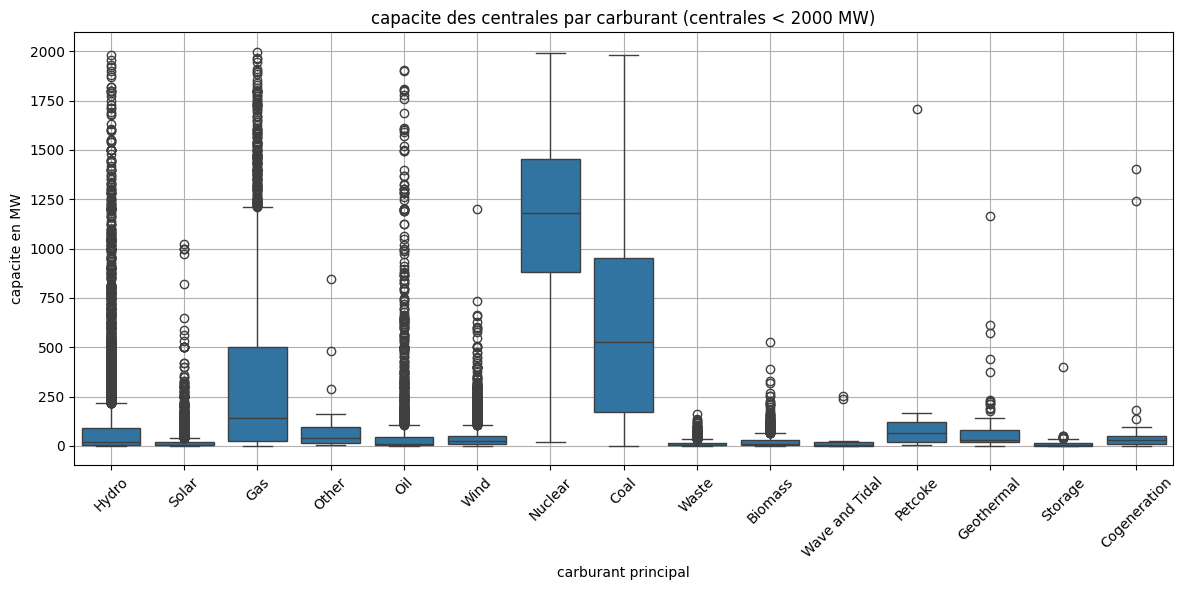

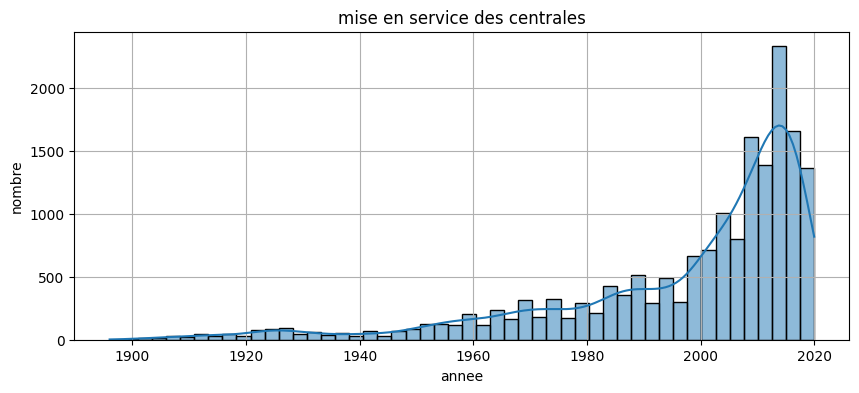

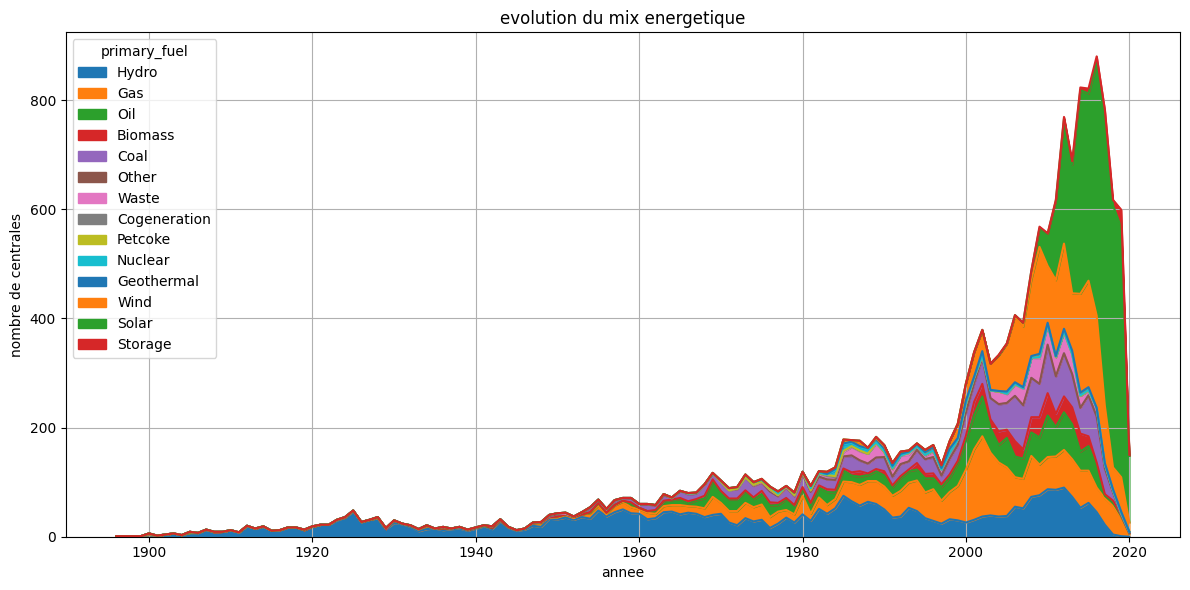

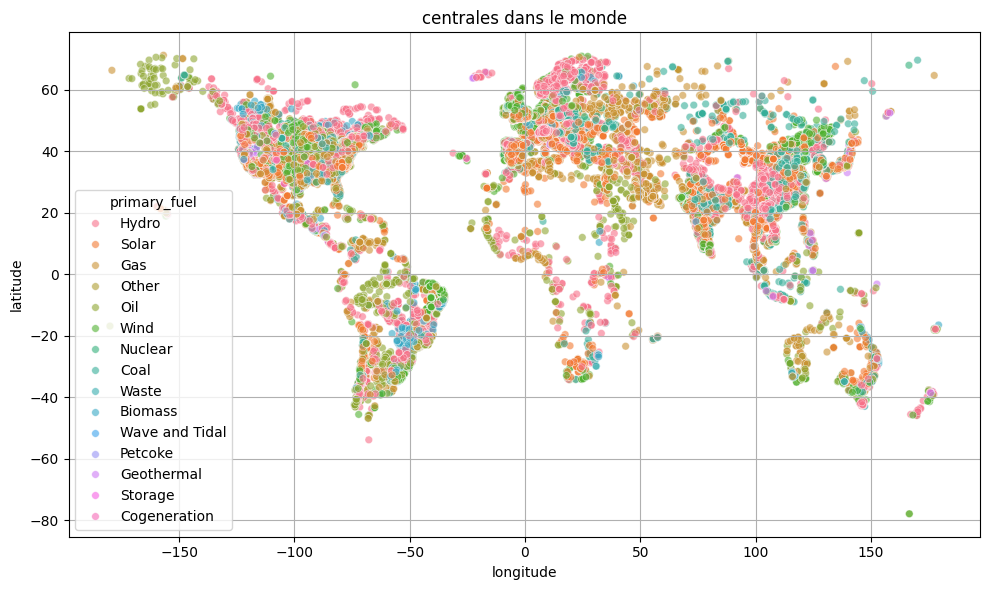

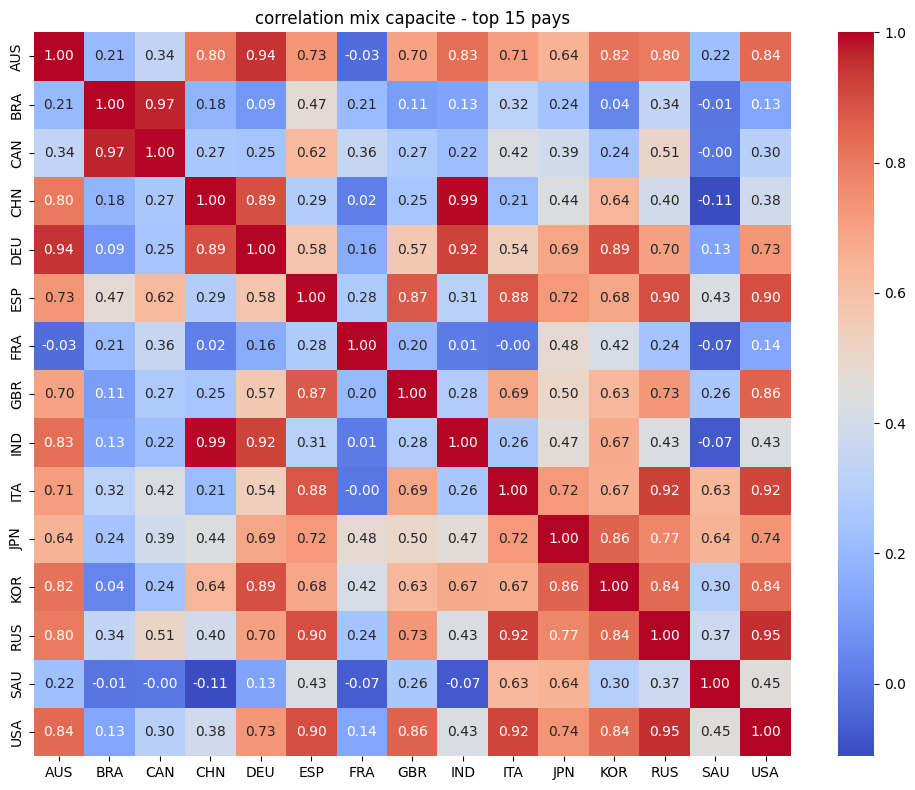

In [34]:
# statistiques descriptives
print(df['capacity_mw'].describe())
print(df['primary_fuel'].value_counts())
print(df['country'].value_counts())

# capacite par type de carburant
fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std', 'count'])
print(fuel_stats)

# filtrer pour ne pas avoir les tres grosses centrales
df_filtered = df[df['capacity_mw'] < 2000]

# boxplot de la capacite par type de carburant
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='primary_fuel', y='capacity_mw')
plt.xticks(rotation=45)
plt.title('capacite des centrales par carburant (centrales < 2000 MW)')
plt.xlabel('carburant principal')
plt.ylabel('capacite en MW')
plt.grid(True)
plt.tight_layout()
plt.show()

# histogramme des annees de mise en service
plt.figure(figsize=(10, 4))
sns.histplot(df['commissioning_year'].dropna(), bins=50, kde=True)
plt.title('mise en service des centrales')
plt.xlabel('annee')
plt.ylabel('nombre')
plt.grid(True)
plt.show()

# mix energetique par an
df_year_fuel = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)
df_year_fuel.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('evolution du mix energetique')
plt.xlabel('annee')
plt.ylabel('nombre de centrales')
plt.grid(True)
plt.tight_layout()
plt.show()

# carte des centrales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='primary_fuel', alpha=0.6, s=30)
plt.title('centrales dans le monde')
plt.grid(True)
plt.tight_layout()
plt.show()

# top 15 pays avec le plus de capacite totale
top_countries = df.groupby('country')['capacity_mw'].sum().sort_values(ascending=False).head(15).index

# filtrer le df
df_top = df[df['country'].isin(top_countries)]

# creer la matrice capacite par carburant
pivot_matrix = df_top.pivot_table(values='capacity_mw', index='country', columns='primary_fuel', aggfunc='sum', fill_value=0)
matrix_np = pivot_matrix.values

# calcul correlation entre pays
correlation_matrix = np.corrcoef(matrix_np)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=pivot_matrix.index, yticklabels=pivot_matrix.index, annot=True, fmt=".2f")
plt.title("correlation mix capacite - top 15 pays")
plt.tight_layout()
plt.show()